<a href="https://colab.research.google.com/github/VINY1958/UMSA/blob/main/cl_ad_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

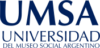

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

https://scikit-learn.org/stable/modules/tree.html#classification

# **Clasificación**

# **Árbol de decisión**

**Un árbol de decisión es un modelo predictivo formado por reglas binarias (si/no) con las que se consigue repartir observaciones del espacio muestral, en función de sus atributos y predecir así el valor de la variable objetivo, o variable dependiente.**

**Muchos métodos predictivos generan modelos en los que una ecuación se aplica a todo el espacio muestral.**

**Cuando el caso de uso implica múltiples predictores, que iteractúan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las distintas variables. El árbol de decisión engloba un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar esas interacciones.**

## **Actualizando los módulos necesarios**

In [1]:
!pip install scikit-learn --upgrade  ### instalación de scikit-learn

## **Carga de librerías necesarias**

### **Para análisis de datos**

In [2]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import numpy as np

### **Para el desarrollo del modelo**

In [3]:
import sklearn #para los algoritmos de aprendizaje automático
from sklearn import tree
import sklearn.metrics as metrics #para la medición de los algoritmos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import pickle #para grabar y recuperar los modelos entrenados

### **Para graficos**

In [4]:
import matplotlib.pyplot as plt #librería gráfica básica
from sklearn.tree import plot_tree

## **Ingeniería de las características de los Datos**

### **Extracción de Datos - Creación del DataFrame**

In [5]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"

In [6]:
archivo = "Clientes.csv"

In [7]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


**El dataframe contiene 5 variables y 400 observaciones.**

**Las variables indican:**
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es Dependiente y 0 cuando es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

**El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.**

### **Selección de características**

In [8]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...**

In [9]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

**Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...**

In [10]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


## **Automatizacion de Procesos**

In [11]:
for i in clientes.columns:  ### automatizacion de contar valores de todas las variables
    print(clientes[i].value_counts())

Trabajo
0    204
1    196
Name: count, dtype: int64
Edad
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64
Salario
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64
Compra
No    257
Si    143
Name: count, dtype: int64


In [12]:
for i in clientes.columns:  ### automatizacion de valores unicos de todas las variables
    print(clientes[i].unique())

[1 0]
[19 35 26 27 32 25 20 18 29 47 45 46 48 49 31 21 28 33 30 23 24 22 59 34
 39 38 37 42 40 36 41 58 55 52 60 56 53 50 51 57 44 43 54]
[ 19000  20000  43000  57000  76000  58000  84000 150000  33000  65000
  80000  52000  86000  18000  82000  25000  26000  28000  29000  22000
  49000  41000  23000  30000  74000 137000  16000  44000  90000  27000
  72000  31000  17000  51000 108000  15000  79000  54000 135000  89000
  32000  83000  55000  48000 117000  87000  66000 120000  63000  68000
 113000 112000  42000  88000  62000 118000  85000  81000  50000 116000
 123000  73000  37000  59000 149000  21000  35000  71000  61000  75000
  53000 107000  96000  45000  47000 100000  38000  69000 148000 115000
  34000  60000  70000  36000  39000 134000 101000 130000 114000 142000
  78000 143000  91000 144000 102000 126000 133000 147000 104000 146000
 122000  97000  95000 131000  77000 125000 106000 141000  93000 138000
 119000 105000  99000 129000  46000  64000 139000]
['No' 'Si']


In [15]:
for i in clientes.columns:  ### automatizacion de la Cuenta el número de elementos distintos en un eje especificado
    print(clientes[i].nunique())

2
43
117
2


In [20]:
for i in clientes.columns:  ### automatizacion de la Cuenta el número de elementos nulos en un eje especificado
    print(clientes[i].isnull().sum())

0
0
0
0


In [24]:
for i in clientes.columns:  ### automatizacion del porcentaje del  número de elementos nulos en un eje especificado
    print(clientes[i].isnull().sum()/clientes.shape[0])

0.0
0.0
0.0
0.0


In [22]:
for i in clientes.columns:  ### automatizacion de la Cuenta el número de elementos nulos en un eje especificado
    print(clientes[i].isna())

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: Trabajo, Length: 400, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: Edad, Length: 400, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: Salario, Length: 400, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Name: Compra, Length: 400, dtype: bool


In [21]:
for i in clientes.columns:  ### automatizacion de la Cuenta el número de elementos nulos en un eje especificado
    print(clientes[i].isna().sum())

0
0
0
0


In [26]:
for i in clientes.columns:  ### automatizacion del porcentaje del  número de elementos nulos en un eje especificado
    print(clientes[i].isna().sum()/clientes.shape[0])

0.0
0.0
0.0
0.0


In [29]:
for i in clientes.columns:  ### automatizacion de la estadistica descriptiva
    print(clientes[i].describe())

count    400.000000
mean       0.490000
std        0.500526
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Trabajo, dtype: float64
count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Edad, dtype: float64
count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: Salario, dtype: float64
count     400
unique      2
top        No
freq      257
Name: Compra, dtype: object


## **División del dataframe**

**Primero se divide el dataframe en variable objetivo $y$ con la columna que contiene los datos etiquetados por un lado, y en vector de entrada de los datos $X=$ con las variables restantes (variables independientes).**

In [30]:
y = clientes["Compra"] #se define la variable objetivo
X = clientes.drop(columns=["Compra"]) #se elimina la variable objetivo del vector de entrada

In [31]:
y #visualizando la variable objetivo

,Compra
0,No
1,No
2,No
3,No
4,No
...,...
395,Si
396,Si
397,Si
398,No


In [32]:
X #visualizando el vector de entrada

,Trabajo,Edad,Salario
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


**Ahora se divide la variable objetivo $y$ en un conjunto de datos de entrenamiento (train) y prueba (test). Lo mismo se realiza para el vector de entrada de los datos $X$.**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**La proporcion es 75% para entrenamiento y 25% para prueba**

In [34]:
X_train.shape

(300, 3)

**De las 400 observaciones del vector de entrada de datos, 300 observaciones son de entrenamiento**

In [35]:
X_test.shape

(100, 3)

**De las 400 observaciones del vector de entrada de datos, 100 observaciones son de prueba**

In [36]:
y_train.shape

(300,)

**De las 400 observaciones de la variable objetivo, 300 observaciones son de entrenamiento**

In [37]:
y_test.shape

(100,)

**De las 400 observaciones de la variable objetivo, 100 observaciones son de prueba**

## **Escala del vector de entrada**

In [38]:
#normalizacion = StandardScaler()

In [39]:
#X_train = normalizacion.fit_transform(X_train)
#X_test = normalizacion.transform(X_test)

# **Evaluando los Algoritmos**

## **Algoritmo Árbol de Decisión**

In [40]:
ad = sklearn.tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=2)

In [41]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

In [42]:
ad = ad.fit(X_train, y_train)

In [43]:
y_pred_ad = ad.predict(X_test)

In [44]:
mc = metrics.confusion_matrix(y_test, y_pred_ad)
print(mc)

[[64  4]
 [ 2 30]]


In [45]:
cm = confusion_matrix(y_test, y_pred_ad, labels=ad.classes_)

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ad.classes_)

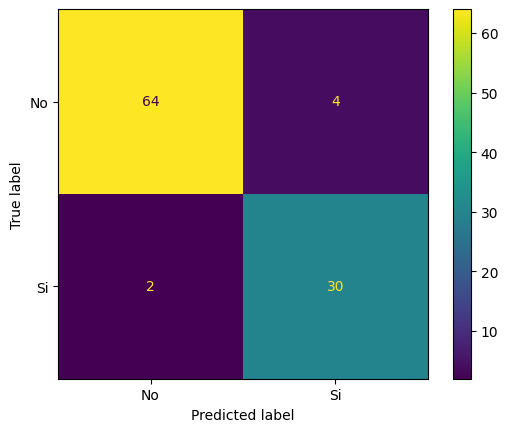

In [47]:
disp.plot();

In [48]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        68
          Si       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



### **Desarrollar otro Modelo**

### **Guardando el modelo**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_arbol_decision.pkl"

In [51]:
file = open(path, "wb")
pickle.dump(ad, file)

### **Leyendo el modelo**

In [53]:
with open(path, "rb") as file:
    modelo_ad = pickle.load(file)

### **Visualización Árbol de Decisión**

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree

In [54]:
variables = ["Trabajo","Edad","Salario"]
compra = ["No","Si"]

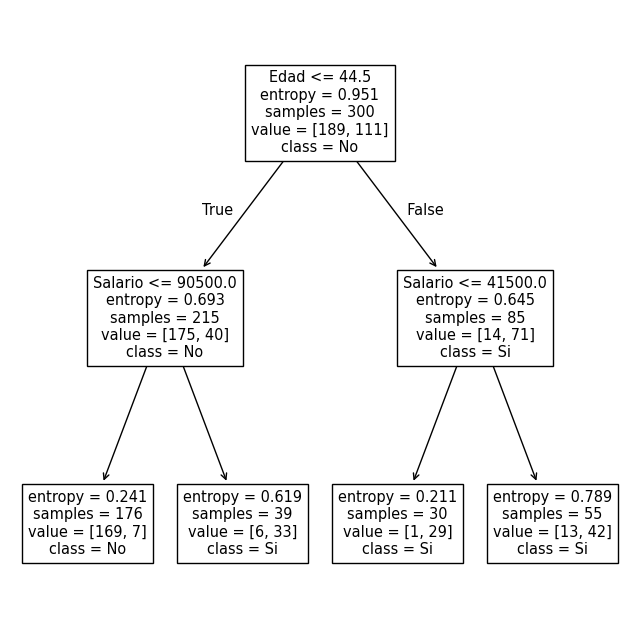

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))

tree.plot_tree(modelo_ad,
               feature_names = variables,
               class_names= compra,
               ax=ax);

Profundidad del árbol: 2
Número de nodos terminales: 4


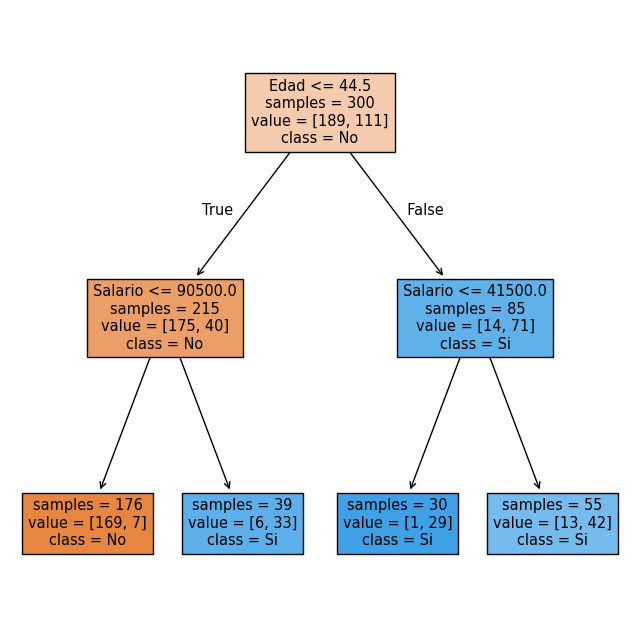

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

print(f"Profundidad del árbol: {modelo_ad.get_depth()}")
print(f"Número de nodos terminales: {modelo_ad.get_n_leaves()}")

plot = plot_tree(decision_tree = modelo_ad,
                 feature_names = variables,
                 class_names   = compra,
                 filled        = True,
                 impurity      = False,
                 ax            = ax)

### **Predicción**

In [57]:
X_test

,Trabajo,Edad,Salario
132,1,30,87000
309,0,38,50000
341,1,35,75000
196,0,30,79000
246,0,35,50000
...,...,...,...
146,0,27,96000
135,1,23,63000
390,1,48,33000
264,1,48,90000


In [58]:
prediccion_ad = modelo_ad.predict(X_test)

In [59]:
print(prediccion_ad)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No'
 'No' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'No'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si'
 'Si' 'Si']


In [60]:
X_test["Compra"] = y_test
X_test

,Trabajo,Edad,Salario,Compra
132,1,30,87000,No
309,0,38,50000,No
341,1,35,75000,No
196,0,30,79000,No
246,0,35,50000,No
...,...,...,...,...
146,0,27,96000,Si
135,1,23,63000,No
390,1,48,33000,Si
264,1,48,90000,Si


In [61]:
X_test["Prediccion"] = prediccion_ad
X_test

,Trabajo,Edad,Salario,Compra,Prediccion
132,1,30,87000,No,No
309,0,38,50000,No,No
341,1,35,75000,No,No
196,0,30,79000,No,No
246,0,35,50000,No,No
...,...,...,...,...,...
146,0,27,96000,Si,Si
135,1,23,63000,No,No
390,1,48,33000,Si,Si
264,1,48,90000,Si,Si
